# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [13]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

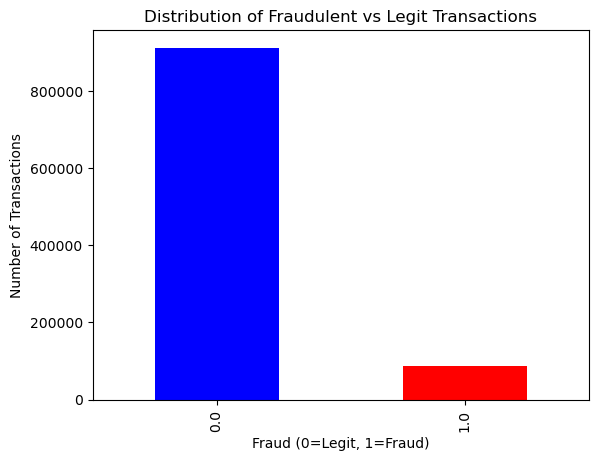

In [9]:
fraud['fraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fraudulent vs Legit Transactions')
plt.xlabel('Fraud (0=Legit, 1=Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
print(fraud['fraud'].value_counts(normalize=True))

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [15]:
# Features and target variable
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.90      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000


Confusion Matrix:
 [[181334   1223]
 [  6924  10519]]


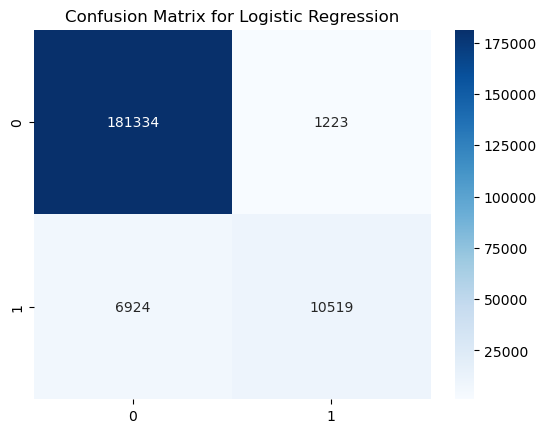

In [17]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Train test split for oversampled data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Logistic Regression on the oversampled data
log_reg_res = LogisticRegression()
log_reg_res.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_res = log_reg_res.predict(X_test_res)
print("Classification Report (Oversampled Data):\n", classification_report(y_test_res, y_pred_res))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Oversampled Data):
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    182421
         1.0       0.93      0.94      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Train Logistic Regression on the undersampled data
log_reg_res = LogisticRegression()
log_reg_res.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_res = log_reg_res.predict(X_test_res)
print("Classification Report (Undersampled Data):\n", classification_report(y_test_res, y_pred_res))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Undersampled Data):
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    182421
         1.0       0.93      0.94      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [23]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Train Logistic Regression on the undersampled data
log_reg_res = LogisticRegression()
log_reg_res.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_res = log_reg_res.predict(X_test_res)
print("Classification Report (Undersampled Data):\n", classification_report(y_test_res, y_pred_res))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Undersampled Data):
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    182421
         1.0       0.93      0.94      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

# Train test split for SMOTE data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Train Logistic Regression on the SMOTE data
log_reg_sm = LogisticRegression()
log_reg_sm.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_sm = log_reg_sm.predict(X_test_sm)
print("Classification Report (SMOTE Data):\n", classification_report(y_test_sm, y_pred_sm))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (SMOTE Data):
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182421
         1.0       0.93      0.95      0.94    182618

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039

